<a href="https://colab.research.google.com/github/Divyanshi-16/Information-Retrieval-1/blob/main/MarathiLang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Name: Divyanshi Chauhan

*   Roll No.: 21074012



*   Discipline: Computer Science and Engineering(IDD)


*   Use source.zip file to upload in the files section in google colab




Done
--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Prob Rank  |
--------------------------------------------------------------------------------
|   1|आहे         |        4581|     4581.00|    0.032117|
|   2|ता          |        4435|     2290.50|    0.031093|
|   3|या          |        4104|     1527.00|    0.028773|
|   4|व           |        2963|     1145.25|    0.020773|
|   5|यांनी       |        2881|      916.20|    0.020198|
|   6|आहेत        |        2672|      763.50|    0.018733|
|   7|आणि         |        2431|      654.43|    0.017044|
|   8|होते        |        2328|      572.62|    0.016321|
|   9|केली        |        2259|      509.00|    0.015838|
|  10|करण्यात     |        2197|      458.10|    0.015403|
|  11|असे         |        2129|      416.45|    0.014926|
|  12|नाही        |        2070|      381.75|    0.014513|
|  13|ते          |        1994|      352.38|    0.013980|
|  14|आ

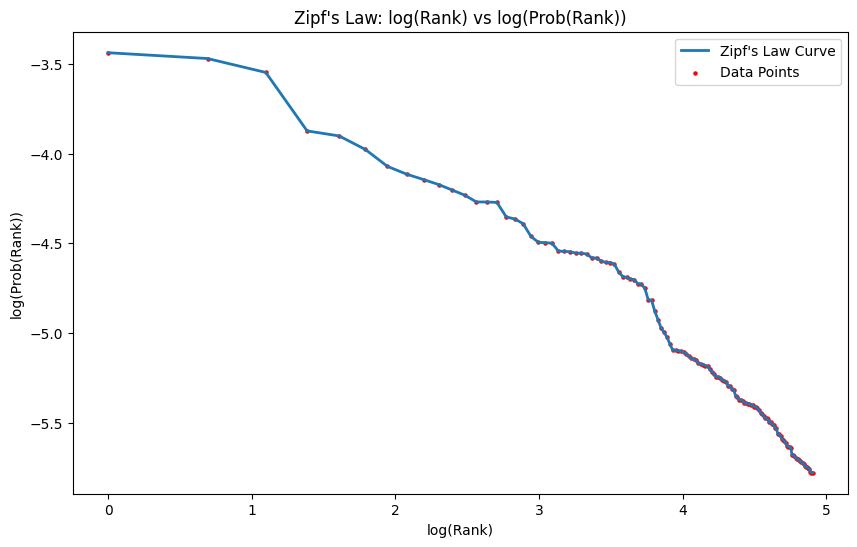

In [ ]:
from zipfile import ZipFile

file_name = "/content/source.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')
import os
import collections
import matplotlib.pyplot as plt
import numpy as np

def generate_zipf_table(text, top):
    text = _remove_punctuation(text)
    text = text.lower()
    top_word_frequencies = _top_word_frequencies(text, top)
    zipf_table = _create_zipf_table(top_word_frequencies)
    return zipf_table

def _remove_punctuation(text):
    chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789doctext"
    tr = str.maketrans("", "", chars_to_remove)
    return text.translate(tr)

def _top_word_frequencies(text, top):
    words = text.split()
    word_frequencies = collections.Counter(words)
    top_word_frequencies = word_frequencies.most_common(top)
    return top_word_frequencies

def _create_zipf_table(frequencies):
    zipf_table = []
    total_words = sum(item[1] for item in frequencies)
    top_frequency = frequencies[0][1]

    for index, item in enumerate(frequencies, start=1):
        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        prob_rank = item[1] / total_words

        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "prob_rank": prob_rank})

    return zipf_table

def process_all_files(directory_path, top):
    all_zipf_data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".htm.txt"):
            file_path = os.path.join(directory_path, filename)
            try:
                with open(file_path, "r", encoding='utf-8') as f:
                    text = f.read()
                    zipf_table = generate_zipf_table(text, top)
                    all_zipf_data.extend(zipf_table)
            except IOError as e:
                print(f"Error reading file {file_path}: {e}")

    return all_zipf_data

def plot_zipf_law(zipf_table):
    ranks = np.arange(1, len(zipf_table) + 1)
    prob_ranks = [item["prob_rank"] for item in zipf_table]

    plt.figure(figsize=(10, 6))
    plt.plot(np.log(ranks), np.log(prob_ranks), label='Zipf\'s Law Curve', linewidth=2)
    plt.scatter(np.log(ranks), np.log(prob_ranks), s=5, color='red', label='Data Points')
    plt.title('Zipf\'s Law: log(Rank) vs log(Prob(Rank))')
    plt.xlabel('log(Rank)')
    plt.ylabel('log(Prob(Rank))')
    plt.legend()
    plt.show()

def print_zipf_table(zipf_table):
    width = 80
    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Prob Rank  |")
    print("-" * width)
    format_string = "|{:4}|{:12}|{:12.0f}|{:12.2f}|{:12.6f}|"

    for index, item in enumerate(zipf_table, start=1):
        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["zipf_frequency"],
                                   item["prob_rank"]))

    print("-" * width)


directory_path = '/content/source'

all_zipf_data = process_all_files(directory_path, 135)


main_zipf_table = _create_zipf_table(_top_word_frequencies(' '.join(item['word'] for item in all_zipf_data), 135))

print_zipf_table(main_zipf_table)
plot_zipf_law(main_zipf_table)


In [ ]:
!pip install nltk
!python -m spacy download en

2024-01-28 14:01:42.188442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 14:01:42.188501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 14:01:42.190116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 14:01:42.199802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-28 14:01:43.489128: W tensorflow/compiler/tf2

In [ ]:
!python -m spacy download xx_ent_wiki_sm

2024-01-28 14:02:08.568127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 14:02:08.568206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 14:02:08.570333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 14:02:08.585435: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-28 14:02:10.769387: W tensorflow/compiler/tf2

In [ ]:
import os
import re
import spacy
import codecs

# Load the spaCy Multilingual model
nlp = spacy.load('xx_ent_wiki_sm')

def load_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
        return text
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def preprocess_text(text):
    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\u0900-\u097F\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

def perform_marathi_stemming(text):
    doc = text.split(u".")
    tokens = []
    for each in doc:
        word_list = each.split(' ')
        tokens = tokens + word_list

    for tok in tokens:
        tok = tok.strip()

    for each in tokens:
        if '-' in each:
            tok = each.split('-')
            tokens.remove(each)
            tokens.append(tok[0])
            tokens.append(tok[1])

    suffixes = {
        1: [u"ो", u"े", u"ू", u"ु", u"ी", u"ि", u"ा", u"च"],
        2: [u"चा", u"चे", u"ने", u"नी", u"ना", u"ते", u"ीं", u"तील", u"ात", u"ाँ", u"ां", u"ों", u"ें", u"तच", u"ता", u"ही",
            u"ले"],
        3: [u"ाचा", u"ाचे", u"तील", u"ानी", u"ाने", u"ाना", u"ाते", u"ाती", u"ाता", u"तीं", u"तून", u"तील", u"तही", u"तपण",
            u"कडे", u"ातच", u"हून", u"पणे", u"ाही", u"ाले"],
        4: [u"मधले", u"ातील", u"च्या", u"न्या", u"ऱ्या", u"ख्या", u"वर", u"साठी", u"ातून", u"कडून", u"मुळे", u"वरून",
            u"ातील", u"नीही", u"ातही", u"ातपण", u"ाकडे", u"पाशी", u"ाहून", u"ापणे", u"मधला"],
        5: [u"ामधले", u"ाच्या", u"ान्या", u"ाऱ्या", u"ाख्या", u"ावर", u"ासाठी", u"पासून", u"ाकडून", u"ामुळे", u"ावरून",
            u"कडेही", u"ानीही", u"ापाशी", u"ामधला", u"मध्ये"],
        6: [u"पर्यंत", u"ापासून", u"ाकडेही", u"पूर्वक", u"लेल्या", u"ामध्ये"],
        7: [u"ापर्यंत", u"प्रमाणे", u"तसुद्धा", u"ापूर्वक", u"ालेल्या"],
        8: [u"ाप्रमाणे", u"ातसुद्धा"],
    }

    stems = []
    for word in tokens:
        for i in range(8, 0, -1):
            if len(word) > i + 1:
                for suf in suffixes[i]:
                    if word.endswith(suf):
                        word = word[:-i]
        if word:
            stems.append(word)

    return stems

def perform_marathi_lemmatization(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return lemmatized_words

def compare_word_counts(original_words, stemmed_words, lemmatized_words):
    unique_words = set(original_words)
    unique_stemmed_words = set(stemmed_words)
    unique_lemmatized_words = set(lemmatized_words)

    return len(unique_words), len(unique_stemmed_words), len(unique_lemmatized_words)


directory_path = '/content/source'

total_unique_words = 0
total_unique_stemmed_words = 0
total_unique_lemmatized_words = 0

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        text = load_text(file_path)

        if text:
            preprocessed_text = preprocess_text(text)

            # Perform stemming
            stemmed_words = perform_marathi_stemming(preprocessed_text)

            # Perform lemmatization
            lemmatized_words = perform_marathi_lemmatization(preprocessed_text)

            # Compare word counts
            unique_words, unique_stemmed_words, unique_lemmatized_words = compare_word_counts(
                preprocessed_text.split(), stemmed_words, lemmatized_words)

            # Accumulate results
            total_unique_words += unique_words
            total_unique_stemmed_words += unique_stemmed_words
            total_unique_lemmatized_words += unique_lemmatized_words

# Print final results
print(f"Total unique words across all files: {total_unique_words}")
print(f"Total unique stemmed words across all files: {total_unique_stemmed_words}")
print(f"Total unique lemmatized words across all files: {total_unique_lemmatized_words}")


Total unique words across all files: 919166
Total unique stemmed words across all files: 835742
Total unique lemmatized words across all files: 5132
